# Uber Rider Data Case Study
Jun 2017

##  Project Overview

Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users.

![Uber](./images/uber.jpg)

## Dataset Description

- city: city this user signed up in
    - city_King's Landing: this user signed up in *King's Landing*
    - city_Winterfell: this user signed up in *Winterfell*
    - city_Astapor: this user signed up in *Astapor*
- phone: primary device for this user
    - phone_Android: primary device for this user is Android
    - phone_iPhone: primary device for this user is iPhone
    - phone_no_phone: primary device for this user is unknown
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday
- churn: a user is regarded as churn if there is no trip made in last 30 days

## Load data and browse data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [3]:
# Load data from file
df = pd.read_csv('data/cleaned_data.csv')

In [4]:
# Browse dataset
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,...,phone_iPhone,phone_no_phone,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,churn
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,10.56,5.0,3.5,1.00,0.0,2,1,100.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
6,3.95,4.0,4.9,1.00,0.0,1,0,100.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
7,2.04,5.0,5.0,1.00,0.0,2,0,100.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
8,4.36,5.0,4.5,1.00,0.0,2,0,100.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
9,2.37,5.0,4.9,1.00,0.0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [5]:
# Show summary stats
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,...,phone_iPhone,phone_no_phone,signup_dow_0,signup_dow_1,signup_dow_2,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,churn
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,0.37708,60.926084,0.330680,0.202600,...,0.691640,0.007920,0.106860,0.102480,0.133760,0.138900,0.195340,0.194400,0.128260,0.623920
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,0.48466,37.081503,0.470463,0.401941,...,0.461821,0.088642,0.308938,0.303282,0.340398,0.345846,0.396466,0.395742,0.334382,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build Logistic Regression Model

### Define Features and Target

In [6]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone']
target = u'churn'

In [7]:
X = df[selected_features].values
y = df['churn'].values

In [8]:
X.shape

(50000L, 14L)

In [9]:
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### Fit a Logistic Regression model using sklearn

#### Let's Train-test split the data!

In [10]:
# import train test split function from sklearn
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#### Now train the model

In [11]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
lr = LogisticRegression(C=100000, fit_intercept=True)

# Fit a model by providing X and y from training set
lr.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = lr.predict(X_train)

# Make predictions on test data
y_test_pred = lr.predict(X_test)

### Calculate the metric scores for the model

In [12]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [13]:
# Helper method to print metric scores
def print_results(y_true, y_pred):
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_true, y_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_true, y_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_true, y_pred)))

In [14]:
print("Training set scores:")
print_results(y_train, y_train_pred)

Training set scores:
Accuracy of the Logistic Regression is: 0.719515789474
Precision of the Logistic Regression is: 0.737406933457
Recall of the Logistic Regression is: 0.855172181187
f1-score of the Logistic Regression is: 0.791935408305


In [15]:
print("Test set scores:")
print_results(y_test, y_test_pred)

Test set scores:
Accuracy of the Logistic Regression is: 0.7072
Precision of the Logistic Regression is: 0.727780883175
Recall of the Logistic Regression is: 0.841628959276
f1-score of the Logistic Regression is: 0.780575539568


### Understanding the Estimated Coefficients

In [16]:
df_coeffs = pd.DataFrame(list(zip(selected_features, lr.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
8,city_Astapor,0.675606
11,phone_Android,0.429428
3,avg_surge,0.197379
10,city_Winterfell,0.160582
1,avg_rating_by_driver,0.146983
2,avg_rating_of_driver,0.121435
0,avg_dist,0.037133
13,phone_no_phone,0.004267
7,weekday_pct,0.000022
4,surge_pct,-0.004197


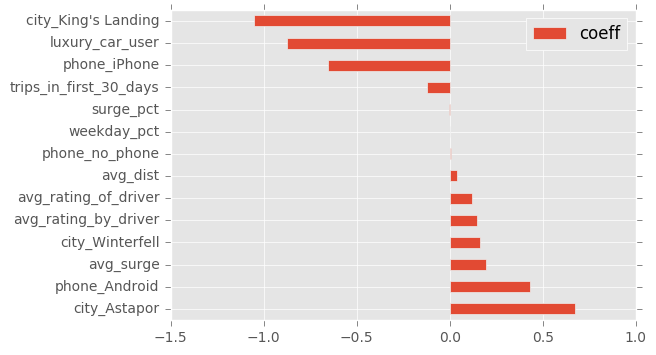

In [17]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### How to interpret coefficient?

***Recall: Increasing the value of $x_i$ by 1 increases the odds ratio by a factor of $e^{\beta_i}$***

Say, for a given user, assume he has a probability to churn at 50%, or in another word, the odd ratio is 1:1 = 1

In [18]:
default_OR = 1 # 50% chance to churn

If a coefficient is 0.2, then, if we increase the corresponding variable by 1 unit, the new odd ratio will be:

In [19]:
beta = 0.2
increase = np.exp(beta)
OR = default_OR * increase
OR

1.2214027581601699

Which is can be converted to chance to churn:

In [20]:
p = OR / (1 + OR)
p

0.54983399731247795

If a coefficient is -0.4, then, if we increase the corresponding variable by 1 unit, the new odd ratio will be:

In [21]:
beta = -0.4
increase = np.exp(beta) * 1
OR = default_OR * increase
OR

0.67032004603563933

Which is can be converted to chance to churn:

In [22]:
p = OR / (1 + OR)
p

0.401312339887548

### More Model Evaluation

#### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [24]:
confusion_matrix(y_test, y_test_pred)

array([[ 466,  487],
       [ 245, 1302]])

In [27]:
# Helper method to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    '''
    Code from sklearn example.
    '''
    
    cm = confusion_matrix(y_true, y_pred)

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[ 8822  9029]
 [ 4294 25355]]


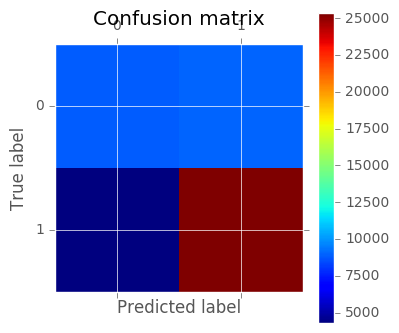

In [28]:
plot_confusion_matrix(y_train, y_train_pred)

[[ 466  487]
 [ 245 1302]]


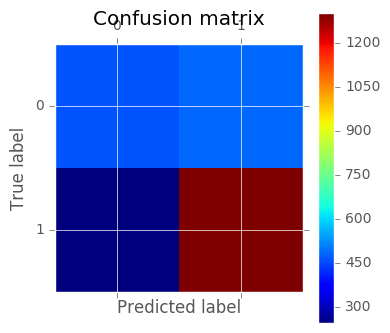

In [29]:
plot_confusion_matrix(y_test, y_test_pred)

#### AUC

In [30]:
print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_test, y_test_pred)))

Area Under Curve (AUC) of the Logistic Regression is: 0.665305560435


#### Classification report

In [31]:
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.66      0.49      0.56       953
          1       0.73      0.84      0.78      1547

avg / total       0.70      0.71      0.70      2500



#### Plot ROC curve

In [32]:
# Make predictions of the probability to be "positive"/"churn"/"1", as compared to "negative"/"not churn"/"0"
y_test_pred_proba = lr.predict_proba(X_test)[:,1]

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

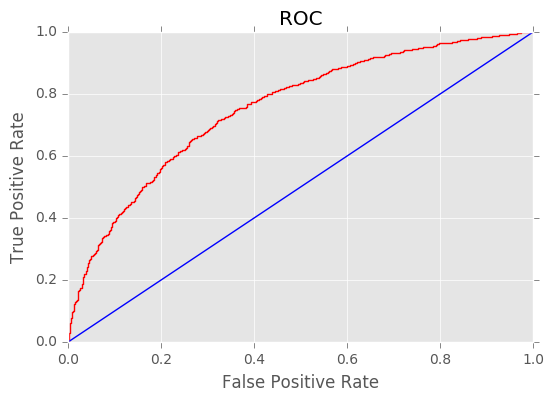

In [34]:
# plot TPR against FPR
plt.plot(fpr, tpr, color='red')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()

## Cost-benefit Analysis - Profit Curve

#### Uber uses sign up coupon to attract new riders

![Signup Coupon](./images/uber_20_off_first_ride_coupon.png)

#### Uber also gives coupon to retain likely churning riders

![retention Coupon](./images/uber_10_off_coupon.png)

### Q: How do we leverage our Logistic Regression model with business value?
### A: Cost-benefit Analysis

#### Confusion matrix

|               |   Actual Yes   |   Actual No    |
| ------------- |:--------------:|:--------------:|
| Predicted Yes | True positive  | False negative |
| Predicted No  | False positive | True negative  |

#### Let's define our cost-benefit matrix

|               |   Actual Yes   |   Actual No    |
| ------------- |:--------------:|:--------------:|
| Predicted Yes |    gain 10     |    lose 10     |
| Predicted No  |     lose 5     |       0        |


#### Define cost-benefit matrix based on business input

In [35]:
costbenefit = np.array([[10, -10],
                      [-5, 0]]) # I am a numpy array, Fill Me In! 
costbenefit

array([[ 10, -10],
       [ -5,   0]])

In [36]:
from sklearn.metrics import confusion_matrix

def standard_confusion_matrix(y_true, y_predict):
    """Given y and predicted y, generate standard orientation
    
    Args:
    =====
    numpy array: y_true - array of true label
    numpy array: y_predict - array of predicted label
    
    Return:
    ======:
    numpy array: confusion matrix, 2x2 numpy array
    """
    n = y_true.shape[0]
    tp = np.sum(y_true * y_predict)
    fp = np.sum((1-y_true)*y_predict)
    tn = np.sum((1-y_true)*(1-y_predict))
    fn = np.sum(y_true*(1-y_predict))
    
    matrix =  np.array([[tp, fp],
                        [fn, tn]])
    return matrix

def profit_curve(cost_benefit_matrix, probabilities, y_true):
    """Given cost-benefit matrix, predicted probability, 
    and true label, calculate expected profit associated with 
    each threshold.
    
    Args:
    =====
    numpy array: cost_benefit_matrix, 2x2 array
    numpy array: probabilities - array of predicted probabilities
    numpy array: y_true - array of true label
    
    Return:
    ======:
    numpy array: threshold
    numpy array: profit
    """
 
    profits = []
    thres = np.sort(probabilities)[::-1]
    n = y_true.shape[0]
    for p in thres:
        y_predict = probabilities > p
        conf_mat = standard_confusion_matrix(y_true, y_predict)
        profit = np.sum(1.0*cost_benefit_matrix * conf_mat /n)
        profits.append(profit)
    return np.array(thres), np.array(profits)

def plot_profit_model(profits, label="Logistic Regression"):
    """Plot profits against pertentage of test instance
    """
    percentages = np.linspace(0, 100, len(profits))
    plt.plot(percentages, profits, label=label)
    plt.title("Profit Curve")
    plt.xlabel("Percentage of test instances (decreasing by score)")
    plt.ylabel("Profit")
    plt.legend(loc='best')
    plt.savefig('profit_curve.png')
    plt.show()
    
def find_best_threshold(thresholds, profits):
    """Find the best threshold that gives max profit
    
    Args:
    =====
    numpy array: thresholds - array of sorted threshold
    numpy array: profits - array of profits
    
    Return:
    ======:
    float: threshold that corresponds to max profit
    float: max profit
    """
    return thresholds[np.argmax(profits)], np.amax(profits)

#### Train a model

In [37]:
lr = LogisticRegression(C=0.1, fit_intercept=True)
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
# Make prediction on training data
y_train_pred = lr.predict(X_train)
print("Training score:")
print(classification_report(y_train, y_train_pred))

Training score:
             precision    recall  f1-score   support

          0       0.67      0.49      0.57     17851
          1       0.74      0.86      0.79     29649

avg / total       0.71      0.72      0.71     47500



In [39]:
# Make predictions on test data
y_test_pred = lr.predict(X_test)
print("Test score:")
print(classification_report(y_test, y_test_pred))

Test score:
             precision    recall  f1-score   support

          0       0.65      0.49      0.56       953
          1       0.73      0.84      0.78      1547

avg / total       0.70      0.71      0.70      2500



#### Plot profit curve 

In [40]:
# Make prediction on the probabilities
probabilities = lr.predict_proba(X_test)[:, 1]

# Calculate expected profits corresponding to different threshold
thresholds, profits = profit_curve(costbenefit, probabilities, y_test)
thresholds, profits

(array([  9.99768962e-01,   9.85580709e-01,   9.74530413e-01, ...,
          2.12067245e-02,   1.65059614e-03,   7.21552146e-04]),
 array([-3.094, -3.098, -3.092, ...,  2.388,  2.384,  2.38 ]))

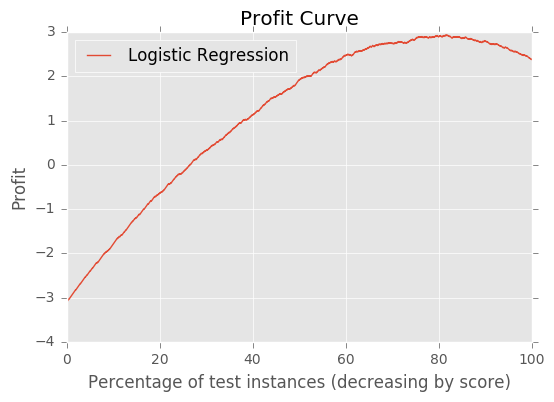

In [41]:
# Plot!
plot_profit_model(profits, label="Logistic Regression")

In [42]:
max_threshold, max_profit = find_best_threshold(thresholds, profits)
max_threshold, max_profit

(0.40586567181345545, 2.9279999999999999)

#### Find the best threshold

In [43]:
print("The best threshold is {}, which gives a max profit of {}".format(max_threshold, max_profit))

The best threshold is 0.405865671813, which gives a max profit of 2.928


#### Make predictions with chosen threshold

In [44]:
y_test_pred = probabilities > max_threshold
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.72      0.35      0.47       953
          1       0.69      0.92      0.79      1547

avg / total       0.70      0.70      0.67      2500

